In [24]:
import numpy as np
import pandas as pd
import os

from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(16,8)})

In [25]:
data_path = '../../../data/train_data/host'
dfs = {}
for file in os.listdir(data_path):
    print('Reading ' + file)
    dfs[file[:-4]] = pd.read_csv(data_path+'/'+file) 

Reading dcos_docker.csv
Reading os_linux.csv
Reading db_oracle_11g.csv
Reading mw_redis.csv
Reading dcos_container.csv


In [26]:
dfs['dcos_docker'].head()

,itemid,name,bomc_id,timestamp,value,cmdb_id
0,999999996381324,container_session_used,ZJ-004-058,1588521611000,0.0,docker_008
1,999999996381333,container_fgct,ZJ-004-104,1588521611000,0.0,docker_008
2,999999996381334,container_cpu_used,ZJ-004-059,1588521611000,0.0,docker_008
3,999999996381323,container_thread_idle,ZJ-004-063,1588521611000,0.0,docker_008
4,999999996381322,container_thread_running,ZJ-004-062,1588521611000,0.0,docker_008


In [ ]:
def normalise(df):
    mean = df['value'].mean()
    std = df['value'].std()
    df['value'] = (df['value'] - training_mean) / training_std
    return df

def gen_train_seq(values):
    TIME_STEPS = 288

    output = []
    for i in range(len(values) - time_steps):
        output.append(values[i : (i + time_steps)])
        
    return np.stack(output)



In [4]:
for key in dfs:
    print('*'*40)
    print(key)
    df = dfs[key]
    for name in list(df_c.name.unique()):
        df_train = df_c[df_c.name==name]
        print(df_train.head())

        for cmdb_id in list(df.cmdb_id.unique()):
            df_c = df[df.cmdb_id == cmdb_id]
            df_c = df_c.set_index('timestamp')[['value']]
            df_c = normalise(df_c)
            
        

****************************************
dcos_docker
              itemid                    name     bomc_id      timestamp  \
0    999999996381324  container_session_used  ZJ-004-058  1588521611000   
72   999999996381324  container_session_used  ZJ-004-058  1588521672000   
144  999999996381324  container_session_used  ZJ-004-058  1588521732000   
217  999999996381324  container_session_used  ZJ-004-058  1588521793000   
288  999999996381324  container_session_used  ZJ-004-058  1588521853000   

     value     cmdb_id  
0      0.0  docker_008  
72     0.0  docker_008  
144    0.0  docker_008  
217    0.0  docker_008  
288    0.0  docker_008  
              itemid            name     bomc_id      timestamp  value  \
1    999999996381333  container_fgct  ZJ-004-104  1588521611000    0.0   
75   999999996381333  container_fgct  ZJ-004-104  1588521672000    0.0   
145  999999996381333  container_fgct  ZJ-004-104  1588521732000    0.0   
220  999999996381333  container_fgct  ZJ-004-104  

391  docker_007  
              itemid            name     bomc_id      timestamp  value  \
48   999999996381310  container_fgct  ZJ-004-104  1588521646000    0.0   
111  999999996381310  container_fgct  ZJ-004-104  1588521705000    0.0   
188  999999996381310  container_fgct  ZJ-004-104  1588521762000    0.0   
265  999999996381310  container_fgct  ZJ-004-104  1588521822000    0.0   
402  999999996381310  container_fgct  ZJ-004-104  1588522124000    0.0   

        cmdb_id  
48   docker_007  
111  docker_007  
188  docker_007  
265  docker_007  
402  docker_007  
              itemid                    name     bomc_id      timestamp  \
49   999999996381298  container_thread_total  ZJ-004-064  1588521646000   
112  999999996381298  container_thread_total  ZJ-004-064  1588521705000   
187  999999996381298  container_thread_total  ZJ-004-064  1588521762000   
264  999999996381298  container_thread_total  ZJ-004-064  1588521822000   
400  999999996381298  container_thread_total  ZJ-004-0

               itemid          name     bomc_id      timestamp     value  \
5            65439900  Disk_io_util  ZJ-001-125  1588521600000  0.000000   
32    999999996431452  Disk_io_util  ZJ-001-101  1588521602000  0.016426   
870          65439900  Disk_io_util  ZJ-001-125  1588521660000  0.000000   
1671         65439900  Disk_io_util  ZJ-001-125  1588521720000  1.000000   
1700  999999996431452  Disk_io_util  ZJ-001-101  1588521722000  0.000000   

     cmdb_id  
5     os_012  
32    os_012  
870   os_012  
1671  os_012  
1700  os_012  
               itemid                  name     bomc_id      timestamp  \
22    999999996431401  Processor_load_1_min  ZJ-001-004  1588521601000   
891   999999996431401  Processor_load_1_min  ZJ-001-004  1588521661000   
1697  999999996431401  Processor_load_1_min  ZJ-001-004  1588521721000   
2515  999999996431401  Processor_load_1_min  ZJ-001-004  1588521782000   
3402  999999996431401  Processor_load_1_min  ZJ-001-004  1588521842000   

        

20675  os_012  
                itemid          name     bomc_id      timestamp     value  \
3831   999999996431375  Buffers_used  ZJ-001-026  1588521875000  0.136814   
8046   999999996431375  Buffers_used  ZJ-001-026  1588522175000  0.136814   
12263  999999996431375  Buffers_used  ZJ-001-026  1588522475000  0.136814   
16488  999999996431375  Buffers_used  ZJ-001-026  1588522775000  0.136814   
20702  999999996431375  Buffers_used  ZJ-001-026  1588523075000  0.136814   

      cmdb_id  
3831   os_012  
8046   os_012  
12263  os_012  
16488  os_012  
20702  os_012  
                itemid           name     bomc_id      timestamp  value  \
3945   999999996431382  Swap_used_pct  ZJ-001-022  1588521882000    0.0   
8158   999999996431382  Swap_used_pct  ZJ-001-022  1588522182000    0.0   
12383  999999996431382  Swap_used_pct  ZJ-001-022  1588522483000    0.0   
16604  999999996431382  Swap_used_pct  ZJ-001-022  1588522783000    0.0   
20809  999999996431382  Swap_used_pct  ZJ-001-022 

        itemid                      name     bomc_id      timestamp     value  \
481   63309517  Incoming_network_traffic  ZJ-001-069  1588521637000  0.000481   
512   63309518  Incoming_network_traffic  ZJ-001-069  1588521638000  0.000000   
520   63309519  Incoming_network_traffic  ZJ-001-069  1588521639000  0.000000   
1325  63309517  Incoming_network_traffic  ZJ-001-069  1588521697000  0.000511   
1351  63309518  Incoming_network_traffic  ZJ-001-069  1588521698000  0.000000   

     cmdb_id  
481   os_007  
512   os_007  
520   os_007  
1325  os_007  
1351  os_007  
               itemid             name     bomc_id      timestamp  value  \
517   999999996432219  Memory_used_pct  ZJ-001-029  1588521639000  19.73   
1355  999999996432219  Memory_used_pct  ZJ-001-029  1588521699000  19.73   
2183  999999996432219  Memory_used_pct  ZJ-001-029  1588521759000  19.73   
3014  999999996432219  Memory_used_pct  ZJ-001-029  1588521819000  19.73   
3885  999999996432219  Memory_used_pct  ZJ-

19514    1.0  os_007  
                itemid                      name     bomc_id      timestamp  \
2739   999999996432199  System_wait_queue_length  ZJ-001-078  1588521799000   
6968   999999996432199  System_wait_queue_length  ZJ-001-078  1588522099000   
11186  999999996432199  System_wait_queue_length  ZJ-001-078  1588522399000   
15404  999999996432199  System_wait_queue_length  ZJ-001-078  1588522699000   
19621  999999996432199  System_wait_queue_length  ZJ-001-078  1588522999000   

       value cmdb_id  
2739     0.0  os_007  
6968     0.0  os_007  
11186    0.0  os_007  
15404    0.0  os_007  
19621    1.0  os_007  
                itemid                       name     bomc_id      timestamp  \
2760   999999996432200  System_block_queue_length  ZJ-001-077  1588521800000   
6976   999999996432200  System_block_queue_length  ZJ-001-077  1588522100000   
11191  999999996432200  System_block_queue_length  ZJ-001-077  1588522400000   
15417  999999996432200  System_block_queue_l

               itemid             name     bomc_id      timestamp     value  \
730   999999996437631  CPU_iowait_time  ZJ-001-010  1588521651000  0.001390   
1540  999999996437631  CPU_iowait_time  ZJ-001-010  1588521711000  0.000000   
2295  999999996437631  CPU_iowait_time  ZJ-001-010  1588521772000  1.176029   
3209  999999996437631  CPU_iowait_time  ZJ-001-010  1588521831000  0.001390   
4089  999999996437631  CPU_iowait_time  ZJ-001-010  1588521891000  0.000000   

     cmdb_id  
730   os_002  
1540  os_002  
2295  os_002  
3209  os_002  
4089  os_002  
               itemid         name     bomc_id      timestamp  value cmdb_id
736   999999996437691  Disk_rd_kbs  ZJ-001-099  1588521651000    0.0  os_002
1547  999999996437691  Disk_rd_kbs  ZJ-001-099  1588521711000    0.0  os_002
2305  999999996437691  Disk_rd_kbs  ZJ-001-099  1588521772000    0.0  os_002
3221  999999996437691  Disk_rd_kbs  ZJ-001-099  1588521831000    0.0  os_002
4098  999999996437691  Disk_rd_kbs  ZJ-001-099  15

                itemid           name     bomc_id      timestamp  value  \
3740   999999996437670  Shared_memory  ZJ-001-016  1588521870000    0.0   
7955   999999996437670  Shared_memory  ZJ-001-016  1588522170000    0.0   
12178  999999996437670  Shared_memory  ZJ-001-016  1588522470000    0.0   
16393  999999996437670  Shared_memory  ZJ-001-016  1588522770000    0.0   
20604  999999996437670  Shared_memory  ZJ-001-016  1588523070000    0.0   

      cmdb_id  
3740   os_002  
7955   os_002  
12178  os_002  
16393  os_002  
20604  os_002  
                itemid           name     bomc_id      timestamp    value  \
3905   999999996437680  FS_used_space  ZJ-001-108  1588521880000  33.1757   
8125   999999996437680  FS_used_space  ZJ-001-108  1588522180000  33.1757   
12342  999999996437680  FS_used_space  ZJ-001-108  1588522480000  33.1757   
16564  999999996437680  FS_used_space  ZJ-001-108  1588522780000  33.1758   
20775  999999996437680  FS_used_space  ZJ-001-108  1588523080000  33

4103  999999996430672  Disk_rd_ios  ZJ-001-098  1588521892000    0.0  os_010
               itemid          name     bomc_id      timestamp      value  \
774   999999996430613  CPU_idle_pct  ZJ-001-008  1588521653000  99.886073   
1594  999999996430613  CPU_idle_pct  ZJ-001-008  1588521714000  99.893482   
2331  999999996430613  CPU_idle_pct  ZJ-001-008  1588521774000  99.882357   
3250  999999996430613  CPU_idle_pct  ZJ-001-008  1588521833000  99.912929   
4123  999999996430613  CPU_idle_pct  ZJ-001-008  1588521893000  99.905525   

     cmdb_id  
774   os_010  
1594  os_010  
2331  os_010  
3250  os_010  
4123  os_010  
               itemid           name     bomc_id      timestamp     value  \
783   999999996430674  Disk_avgqu_sz  ZJ-001-097  1588521654000  0.000000   
1578  999999996430674  Disk_avgqu_sz  ZJ-001-097  1588521714000  0.000166   
2354  999999996430674  Disk_avgqu_sz  ZJ-001-097  1588521775000  0.000163   
3278  999999996430674  Disk_avgqu_sz  ZJ-001-097  158852183400

                itemid                      name     bomc_id      timestamp  \
1832   999999996430631  System_wait_queue_length  ZJ-001-078  1588521731000   
6051   999999996430631  System_wait_queue_length  ZJ-001-078  1588522031000   
10260  999999996430631  System_wait_queue_length  ZJ-001-078  1588522331000   
14473  999999996430631  System_wait_queue_length  ZJ-001-078  1588522631000   
18702  999999996430631  System_wait_queue_length  ZJ-001-078  1588522931000   

       value cmdb_id  
1832     1.0  os_010  
6051     2.0  os_010  
10260    1.0  os_010  
14473    1.0  os_010  
18702    1.0  os_010  
                itemid                       name     bomc_id      timestamp  \
1844   999999996430632  System_block_queue_length  ZJ-001-077  1588521732000   
6060   999999996430632  System_block_queue_length  ZJ-001-077  1588522032000   
10278  999999996430632  System_block_queue_length  ZJ-001-077  1588522332000   
14490  999999996430632  System_block_queue_length  ZJ-001-077  1588

3781  os_009  
               itemid              name     bomc_id      timestamp      value  \
426   999999996432272  Memory_available  ZJ-001-025  1588521632000  15.523449   
1272  999999996432272  Memory_available  ZJ-001-025  1588521692000  15.513802   
2091  999999996432272  Memory_available  ZJ-001-025  1588521752000  15.517517   
2928  999999996432272  Memory_available  ZJ-001-025  1588521813000  15.516369   
3779  999999996432272  Memory_available  ZJ-001-025  1588521872000  15.525387   

     cmdb_id  
426   os_009  
1272  os_009  
2091  os_009  
2928  os_009  
3779  os_009  
                itemid           name     bomc_id      timestamp    value  \
526    999999996432340  FS_used_space  ZJ-001-108  1588521640000  26.2868   
4741   999999996432340  FS_used_space  ZJ-001-108  1588521940000  26.3024   
8961   999999996432340  FS_used_space  ZJ-001-108  1588522240000  26.3185   
13163  999999996432340  FS_used_space  ZJ-001-108  1588522542000  26.3349   
17396  999999996432340 

                itemid          name     bomc_id      timestamp     value  \
3756   999999996432271  Buffers_used  ZJ-001-026  1588521871000  0.375851   
7971   999999996432271  Buffers_used  ZJ-001-026  1588522171000  0.375862   
12185  999999996432271  Buffers_used  ZJ-001-026  1588522471000  0.375870   
16411  999999996432271  Buffers_used  ZJ-001-026  1588522771000  0.375874   
20626  999999996432271  Buffers_used  ZJ-001-026  1588523071000  0.375874   

      cmdb_id  
3756   os_009  
7971   os_009  
12185  os_009  
16411  os_009  
20626  os_009  
                itemid           name     bomc_id      timestamp  value  \
3869   999999996432278  Swap_used_pct  ZJ-001-022  1588521878000    0.0   
8071   999999996432278  Swap_used_pct  ZJ-001-022  1588522178000    0.0   
12306  999999996432278  Swap_used_pct  ZJ-001-022  1588522478000    0.0   
16527  999999996432278  Swap_used_pct  ZJ-001-022  1588522778000    0.0   
20743  999999996432278  Swap_used_pct  ZJ-001-022  1588523078000  

                itemid                      name     bomc_id      timestamp  \
3412   999999996430743  System_wait_queue_length  ZJ-001-078  1588521843000   
7636   999999996430743  System_wait_queue_length  ZJ-001-078  1588522144000   
11852  999999996430743  System_wait_queue_length  ZJ-001-078  1588522443000   
16074  999999996430743  System_wait_queue_length  ZJ-001-078  1588522743000   
20281  999999996430743  System_wait_queue_length  ZJ-001-078  1588523043000   

       value cmdb_id  
3412     0.0  os_006  
7636     0.0  os_006  
11852    0.0  os_006  
16074    0.0  os_006  
20281    0.0  os_006  
                itemid                       name     bomc_id      timestamp  \
3424   999999996430744  System_block_queue_length  ZJ-001-077  1588521844000   
7640   999999996430744  System_block_queue_length  ZJ-001-077  1588522145000   
11858  999999996430744  System_block_queue_length  ZJ-001-077  1588522444000   
16076  999999996430744  System_block_queue_length  ZJ-001-077  1588

               itemid        name     bomc_id      timestamp  value cmdb_id
324   999999996430225  Disk_await  ZJ-001-096  1588521626000    0.0  os_022
1165  999999996430225  Disk_await  ZJ-001-096  1588521686000    0.0  os_022
1989  999999996430225  Disk_await  ZJ-001-096  1588521746000    0.0  os_022
2823  999999996430225  Disk_await  ZJ-001-096  1588521806000    0.0  os_022
3675  999999996430225  Disk_await  ZJ-001-096  1588521866000    0.0  os_022
               itemid           name     bomc_id      timestamp     value  \
331   999999996430226  Disk_avgqu_sz  ZJ-001-097  1588521626000  0.052277   
1174  999999996430226  Disk_avgqu_sz  ZJ-001-097  1588521686000  0.051801   
1994  999999996430226  Disk_avgqu_sz  ZJ-001-097  1588521746000  0.052137   
2830  999999996430226  Disk_avgqu_sz  ZJ-001-097  1588521806000  0.378549   
3678  999999996430226  Disk_avgqu_sz  ZJ-001-097  1588521866000  0.047553   

     cmdb_id  
331   os_022  
1174  os_022  
1994  os_022  
2830  os_022  
3678  

               itemid                  name     bomc_id      timestamp  value  \
9     999999996431520  Memory_available_pct  ZJ-001-017  1588521600000  59.56   
873   999999996431520  Memory_available_pct  ZJ-001-017  1588521660000  59.55   
1689  999999996431520  Memory_available_pct  ZJ-001-017  1588521721000  59.55   
2572  999999996431520  Memory_available_pct  ZJ-001-017  1588521786000  59.54   
3367  999999996431520  Memory_available_pct  ZJ-001-017  1588521841000  59.55   

     cmdb_id  
9     os_011  
873   os_011  
1689  os_011  
2572  os_011  
3367  os_011  
               itemid      name     bomc_id      timestamp  value cmdb_id
29    999999996431522  ss_total  ZJ-001-107  1588521602000  470.0  os_011
893   999999996431522  ss_total  ZJ-001-107  1588521662000  527.0  os_011
1699  999999996431522  ss_total  ZJ-001-107  1588521722000  488.0  os_011
2517  999999996431522  ss_total  ZJ-001-107  1588521783000  501.0  os_011
3383  999999996431522  ss_total  ZJ-001-107  15885218

19003  os_011  
                itemid         name     bomc_id      timestamp    value  \
2144   999999996431557  FS_used_pct  ZJ-001-109  1588521757000  21.8751   
6368   999999996431557  FS_used_pct  ZJ-001-109  1588522057000  21.8756   
10581  999999996431557  FS_used_pct  ZJ-001-109  1588522357000  21.8761   
14793  999999996431557  FS_used_pct  ZJ-001-109  1588522657000  21.8766   
19015  999999996431557  FS_used_pct  ZJ-001-109  1588522957000  21.8772   

      cmdb_id  
2144   os_011  
6368   os_011  
10581  os_011  
14793  os_011  
19015  os_011  
                itemid            name     bomc_id      timestamp    value  \
2178   999999996431558  FS_total_space  ZJ-001-110  1588521758000  39.2121   
6393   999999996431558  FS_total_space  ZJ-001-110  1588522058000  39.2121   
10597  999999996431558  FS_total_space  ZJ-001-110  1588522358000  39.2121   
14816  999999996431558  FS_total_space  ZJ-001-110  1588522658000  39.2121   
19046  999999996431558  FS_total_space  ZJ-001-

               itemid                   name     bomc_id      timestamp  \
458   999999996430954  Processor_load_15_min  ZJ-001-003  1588521634000   
1301  999999996430954  Processor_load_15_min  ZJ-001-003  1588521694000   
2120  999999996430954  Processor_load_15_min  ZJ-001-003  1588521754000   
2962  999999996430954  Processor_load_15_min  ZJ-001-003  1588521815000   
3817  999999996430954  Processor_load_15_min  ZJ-001-003  1588521874000   

         value cmdb_id  
458   0.008333  os_015  
1301  0.008333  os_015  
2120  0.008333  os_015  
2962  0.008333  os_015  
3817  0.008333  os_015  
               itemid          name     bomc_id      timestamp     value  \
476   999999996431016  CPU_util_pct  ZJ-001-001  1588521636000  0.377988   
1319  999999996431016  CPU_util_pct  ZJ-001-001  1588521696000  0.366932   
2141  999999996431016  CPU_util_pct  ZJ-001-001  1588521756000  0.478097   
3239  999999996431016  CPU_util_pct  ZJ-001-001  1588521832000  0.430855   
3841  9999999964310

                itemid                      name     bomc_id      timestamp  \
2247   999999996430967  System_wait_queue_length  ZJ-001-078  1588521768000   
6546   999999996430967  System_wait_queue_length  ZJ-001-078  1588522067000   
10763  999999996430967  System_wait_queue_length  ZJ-001-078  1588522367000   
14972  999999996430967  System_wait_queue_length  ZJ-001-078  1588522667000   
19198  999999996430967  System_wait_queue_length  ZJ-001-078  1588522967000   

       value cmdb_id  
2247     0.0  os_015  
6546     0.0  os_015  
10763    0.0  os_015  
14972    0.0  os_015  
19198    0.0  os_015  
                itemid                       name     bomc_id      timestamp  \
2261   999999996430968  System_block_queue_length  ZJ-001-077  1588521770000   
6555   999999996430968  System_block_queue_length  ZJ-001-077  1588522068000   
10770  999999996430968  System_block_queue_length  ZJ-001-077  1588522368000   
14976  999999996430968  System_block_queue_length  ZJ-001-077  1588

3645  os_017  
               itemid       name     bomc_id      timestamp  value cmdb_id
302   999999996487851  ICMP_ping  ZJ-001-079  1588521624000    1.0  os_017
1125  999999996487851  ICMP_ping  ZJ-001-079  1588521683000    1.0  os_017
1965  999999996487851  ICMP_ping  ZJ-001-079  1588521744000    1.0  os_017
2802  999999996487851  ICMP_ping  ZJ-001-079  1588521804000    1.0  os_017
3649  999999996487851  ICMP_ping  ZJ-001-079  1588521864000    1.0  os_017
               itemid         name     bomc_id      timestamp     value  \
303   999999996487824  Memory_used  ZJ-001-031  1588521624000  5.800774   
1146  999999996487824  Memory_used  ZJ-001-031  1588521684000  5.798218   
1972  999999996487824  Memory_used  ZJ-001-031  1588521744000  5.804951   
2804  999999996487824  Memory_used  ZJ-001-031  1588521804000  5.802986   
3655  999999996487824  Memory_used  ZJ-001-031  1588521864000  5.801739   

     cmdb_id  
303   os_017  
1146  os_017  
1972  os_017  
2804  os_017  
3655  os_

               itemid        name     bomc_id      timestamp  value cmdb_id
764   999999996487853  Agent_ping  ZJ-001-080  1588521653000    1.0  os_017
1587  999999996487853  Agent_ping  ZJ-001-080  1588521714000    1.0  os_017
2326  999999996487853  Agent_ping  ZJ-001-080  1588521774000    1.0  os_017
3246  999999996487853  Agent_ping  ZJ-001-080  1588521833000    1.0  os_017
4128  999999996487853  Agent_ping  ZJ-001-080  1588521893000    1.0  os_017
               itemid                  name     bomc_id      timestamp  value  \
817   999999996487796  Memory_available_pct  ZJ-001-017  1588521656000  92.61   
1621  999999996487796  Memory_available_pct  ZJ-001-017  1588521716000  92.61   
2576  999999996487796  Memory_available_pct  ZJ-001-017  1588521786000  92.61   
3358  999999996487796  Memory_available_pct  ZJ-001-017  1588521840000  92.61   
4171  999999996487796  Memory_available_pct  ZJ-001-017  1588521896000  92.61   

     cmdb_id  
817   os_017  
1621  os_017  
2576  os_017

        itemid                      name     bomc_id      timestamp     value  \
417   63309572  Outgoing_network_traffic  ZJ-001-072  1588521632000  0.000580   
431   63309573  Outgoing_network_traffic  ZJ-001-072  1588521633000  0.000000   
448   63309574  Outgoing_network_traffic  ZJ-001-072  1588521634000  0.000000   
1263  63309572  Outgoing_network_traffic  ZJ-001-072  1588521692000  0.000542   
1278  63309573  Outgoing_network_traffic  ZJ-001-072  1588521693000  0.000000   

     cmdb_id  
417   os_008  
431   os_008  
448   os_008  
1263  os_008  
1278  os_008  
               itemid           name     bomc_id      timestamp     value  \
495   999999996432398  CPU_user_time  ZJ-001-015  1588521638000  0.094476   
1336  999999996432398  CPU_user_time  ZJ-001-015  1588521698000  0.097249   
2180  999999996432398  CPU_user_time  ZJ-001-015  1588521758000  0.119471   
3013  999999996432398  CPU_user_time  ZJ-001-015  1588521818000  0.100019   
3882  999999996432398  CPU_user_time  

                itemid            name     bomc_id      timestamp  value  \
1572   999999996432413  Zombie_Process  ZJ-001-126  1588521714000    0.0   
5784   999999996432413  Zombie_Process  ZJ-001-126  1588522013000    0.0   
10015  999999996432413  Zombie_Process  ZJ-001-126  1588522313000    0.0   
14219  999999996432413  Zombie_Process  ZJ-001-126  1588522613000    0.0   
18452  999999996432413  Zombie_Process  ZJ-001-126  1588522913000    0.0   

      cmdb_id  
1572   os_008  
5784   os_008  
10015  os_008  
14219  os_008  
18452  os_008  
                itemid                      name     bomc_id      timestamp  \
1582   999999996432414  Num_of_running_processes  ZJ-001-075  1588521714000   
5805   999999996432414  Num_of_running_processes  ZJ-001-075  1588522014000   
10034  999999996432414  Num_of_running_processes  ZJ-001-075  1588522314000   
14228  999999996432414  Num_of_running_processes  ZJ-001-075  1588522614000   
18459  999999996432414  Num_of_running_processes  ZJ

                itemid            name     bomc_id      timestamp    value  \
287    999999996482122  FS_total_space  ZJ-001-110  1588521622000  299.962   
4499   999999996482122  FS_total_space  ZJ-001-110  1588521922000  299.962   
8718   999999996482122  FS_total_space  ZJ-001-110  1588522222000  299.962   
13216  999999996482122  FS_total_space  ZJ-001-110  1588522544000  299.962   
17158  999999996482122  FS_total_space  ZJ-001-110  1588522822000  299.962   

      cmdb_id  
287    os_020  
4499   os_020  
8718   os_020  
13216  os_020  
17158  os_020  
                itemid         name     bomc_id      timestamp  value cmdb_id
296    999999996482123  FS_max_util  ZJ-001-105  1588521623000   76.0  os_020
4518   999999996482123  FS_max_util  ZJ-001-105  1588521924000   76.0  os_020
8732   999999996482123  FS_max_util  ZJ-001-105  1588522223000   76.0  os_020
12936  999999996482123  FS_max_util  ZJ-001-105  1588522524000   76.0  os_020
17168  999999996482123  FS_max_util  ZJ-001-1

                itemid            name     bomc_id      timestamp  value  \
4214   999999996482099  Received_queue  ZJ-001-063  1588521900000    0.0   
8431   999999996482099  Received_queue  ZJ-001-063  1588522199000    0.0   
12647  999999996482099  Received_queue  ZJ-001-063  1588522500000    0.0   
16861  999999996482099  Received_queue  ZJ-001-063  1588522799000    0.0   
21086  999999996482099  Received_queue  ZJ-001-063  1588523100000    0.0   

      cmdb_id  
4214   os_020  
8431   os_020  
12647  os_020  
16861  os_020  
21086  os_020  
                 itemid          name     bomc_id      timestamp      value  \
28786   999999996482048  Memory_total  ZJ-001-030  1588523648000  78.505753   
79356   999999996482048  Memory_total  ZJ-001-030  1588527248000  78.505753   
129973  999999996482048  Memory_total  ZJ-001-030  1588530848000  78.505753   
180569  999999996482048  Memory_total  ZJ-001-030  1588534449000  78.505753   
231220  999999996482048  Memory_total  ZJ-001-030  1

20246    0.0  os_004  
                itemid        name     bomc_id      timestamp  value cmdb_id
3447   999999996431646  Sent_queue  ZJ-001-064  1588521846000    2.0  os_004
7671   999999996431646  Sent_queue  ZJ-001-064  1588522146000    0.0  os_004
11885  999999996431646  Sent_queue  ZJ-001-064  1588522446000    2.0  os_004
16104  999999996431646  Sent_queue  ZJ-001-064  1588522746000    2.0  os_004
20319  999999996431646  Sent_queue  ZJ-001-064  1588523046000    2.0  os_004
                itemid            name     bomc_id      timestamp  value  \
3475   999999996431647  Received_queue  ZJ-001-063  1588521848000    0.0   
7683   999999996431647  Received_queue  ZJ-001-063  1588522147000    0.0   
11901  999999996431647  Received_queue  ZJ-001-063  1588522447000    0.0   
16123  999999996431647  Received_queue  ZJ-001-063  1588522747000    0.0   
20335  999999996431647  Received_queue  ZJ-001-063  1588523047000    0.0   

      cmdb_id  
3475   os_004  
7683   os_004  
11901  os_

3857  0.01875  os_003  
               itemid       name     bomc_id      timestamp  value cmdb_id
489   999999996431799  ICMP_ping  ZJ-001-079  1588521638000    1.0  os_003
1321  999999996431799  ICMP_ping  ZJ-001-079  1588521697000    1.0  os_003
2339  999999996431799  ICMP_ping  ZJ-001-079  1588521775000    1.0  os_003
2979  999999996431799  ICMP_ping  ZJ-001-079  1588521818000    1.0  os_003
3845  999999996431799  ICMP_ping  ZJ-001-079  1588521877000    1.0  os_003
               itemid                   name     bomc_id      timestamp  \
502   999999996431738  Processor_load_15_min  ZJ-001-003  1588521638000   
1342  999999996431738  Processor_load_15_min  ZJ-001-003  1588521698000   
2167  999999996431738  Processor_load_15_min  ZJ-001-003  1588521758000   
2994  999999996431738  Processor_load_15_min  ZJ-001-003  1588521818000   
3875  999999996431738  Processor_load_15_min  ZJ-001-003  1588521878000   

        value cmdb_id  
502   0.02500  os_003  
1342  0.02625  os_003  
216

               itemid           name     bomc_id      timestamp     value  \
39    999999996430382  CPU_user_time  ZJ-001-015  1588521602000  0.467160   
901   999999996430382  CPU_user_time  ZJ-001-015  1588521662000  0.293329   
1710  999999996430382  CPU_user_time  ZJ-001-015  1588521722000  0.298760   
2533  999999996430382  CPU_user_time  ZJ-001-015  1588521783000  0.314330   
3406  999999996430382  CPU_user_time  ZJ-001-015  1588521842000  0.346324   

     cmdb_id  
39    os_001  
901   os_001  
1710  os_001  
2533  os_001  
3406  os_001  
               itemid         name     bomc_id      timestamp  value cmdb_id
42    999999996430443  Disk_wr_ios  ZJ-001-102  1588521603000    0.0  os_001
906   999999996430443  Disk_wr_ios  ZJ-001-102  1588521663000    1.0  os_001
1713  999999996430443  Disk_wr_ios  ZJ-001-102  1588521723000    1.0  os_001
2534  999999996430443  Disk_wr_ios  ZJ-001-102  1588521784000    1.0  os_001
3407  999999996430443  Disk_wr_ios  ZJ-001-102  1588521843000 

                itemid        name     bomc_id      timestamp  value cmdb_id
2948   999999996430414  Sent_queue  ZJ-001-064  1588521814000    0.0  os_001
7165   999999996430414  Sent_queue  ZJ-001-064  1588522114000    0.0  os_001
11379  999999996430414  Sent_queue  ZJ-001-064  1588522414000    0.0  os_001
15607  999999996430414  Sent_queue  ZJ-001-064  1588522714000    0.0  os_001
19821  999999996430414  Sent_queue  ZJ-001-064  1588523014000    0.0  os_001
                itemid            name     bomc_id      timestamp  value  \
2951   999999996430415  Received_queue  ZJ-001-063  1588521815000    0.0   
7178   999999996430415  Received_queue  ZJ-001-063  1588522115000    0.0   
11399  999999996430415  Received_queue  ZJ-001-063  1588522415000    0.0   
15616  999999996430415  Received_queue  ZJ-001-063  1588522715000    0.0   
19831  999999996430415  Received_queue  ZJ-001-063  1588523015000    0.0   

      cmdb_id  
2951   os_001  
7178   os_001  
11399  os_001  
15616  os_001  
1

        itemid                      name     bomc_id      timestamp     value  \
366   63309269  Incoming_network_traffic  ZJ-001-069  1588521629000  0.008752   
380   63309270  Incoming_network_traffic  ZJ-001-069  1588521630000  0.000000   
402   63309271  Incoming_network_traffic  ZJ-001-069  1588521631000  0.000000   
1207  63309269  Incoming_network_traffic  ZJ-001-069  1588521689000  0.008725   
1227  63309270  Incoming_network_traffic  ZJ-001-069  1588521690000  0.000000   

     cmdb_id  
366   os_013  
380   os_013  
402   os_013  
1207  os_013  
1227  os_013  
               itemid             name     bomc_id      timestamp  value  \
588   999999996431323  Memory_used_pct  ZJ-001-029  1588521643000  36.08   
1423  999999996431323  Memory_used_pct  ZJ-001-029  1588521703000  36.08   
2452  999999996431323  Memory_used_pct  ZJ-001-029  1588521780000  36.08   
3091  999999996431323  Memory_used_pct  ZJ-001-029  1588521823000  36.07   
3963  999999996431323  Memory_used_pct  ZJ-

               itemid             name     bomc_id      timestamp  value  \
46    999999996431883  Memory_used_pct  ZJ-001-029  1588521603000  45.52   
910   999999996431883  Memory_used_pct  ZJ-001-029  1588521663000  45.52   
1717  999999996431883  Memory_used_pct  ZJ-001-029  1588521723000  45.52   
2538  999999996431883  Memory_used_pct  ZJ-001-029  1588521784000  45.52   
3411  999999996431883  Memory_used_pct  ZJ-001-029  1588521843000  45.51   

     cmdb_id  
46    os_005  
910   os_005  
1717  os_005  
2538  os_005  
3411  os_005  
               itemid              name     bomc_id      timestamp     value  \
54    999999996431824  Memory_available  ZJ-001-025  1588521604000  8.489349   
919   999999996431824  Memory_available  ZJ-001-025  1588521664000  8.488174   
1727  999999996431824  Memory_available  ZJ-001-025  1588521724000  8.487991   
2557  999999996431824  Memory_available  ZJ-001-025  1588521785000  8.488575   
3435  999999996431824  Memory_available  ZJ-001-025  

                itemid                      name     bomc_id      timestamp  \
2462   999999996431863  System_wait_queue_length  ZJ-001-078  1588521780000   
6477   999999996431863  System_wait_queue_length  ZJ-001-078  1588522063000   
10699  999999996431863  System_wait_queue_length  ZJ-001-078  1588522363000   
14904  999999996431863  System_wait_queue_length  ZJ-001-078  1588522663000   
19125  999999996431863  System_wait_queue_length  ZJ-001-078  1588522963000   

       value cmdb_id  
2462     2.0  os_005  
6477     2.0  os_005  
10699    2.0  os_005  
14904    2.0  os_005  
19125    3.0  os_005  
                itemid                       name     bomc_id      timestamp  \
2490   999999996431864  System_block_queue_length  ZJ-001-077  1588521781000   
6494   999999996431864  System_block_queue_length  ZJ-001-077  1588522064000   
10713  999999996431864  System_block_queue_length  ZJ-001-077  1588522364000   
14922  999999996431864  System_block_queue_length  ZJ-001-077  1588

               itemid           name     bomc_id      timestamp     value  \
509   999999996430898  Disk_avgqu_sz  ZJ-001-097  1588521638000  0.010117   
1347  999999996430898  Disk_avgqu_sz  ZJ-001-097  1588521698000  0.012006   
2173  999999996430898  Disk_avgqu_sz  ZJ-001-097  1588521758000  0.020512   
3001  999999996430898  Disk_avgqu_sz  ZJ-001-097  1588521818000  0.011074   
3865  999999996430898  Disk_avgqu_sz  ZJ-001-097  1588521878000  0.011622   

     cmdb_id  
509   os_016  
1347  os_016  
2173  os_016  
3001  os_016  
3865  os_016  
               itemid                  name     bomc_id      timestamp  \
535   999999996430840  Processor_load_5_min  ZJ-001-005  1588521640000   
1372  999999996430840  Processor_load_5_min  ZJ-001-005  1588521700000   
2203  999999996430840  Processor_load_5_min  ZJ-001-005  1588521760000   
3040  999999996430840  Processor_load_5_min  ZJ-001-005  1588521820000   
3901  999999996430840  Processor_load_5_min  ZJ-001-005  1588521880000   

  

              itemid          name     bomc_id      timestamp  value cmdb_id
80          65431686  Disk_io_util  ZJ-001-125  1588521606000    0.0  os_021
106         65431687  Disk_io_util  ZJ-001-125  1588521607000    0.0  os_021
113         65431688  Disk_io_util  ZJ-001-125  1588521608000    0.0  os_021
511  999999996430108  Disk_io_util  ZJ-001-101  1588521638000    0.0  os_021
943         65431686  Disk_io_util  ZJ-001-125  1588521666000    0.0  os_021
               itemid             name     bomc_id      timestamp  value  \
151   999999996430091  Memory_used_pct  ZJ-001-029  1588521611000  48.69   
1004  999999996430091  Memory_used_pct  ZJ-001-029  1588521671000  48.68   
1828  999999996430091  Memory_used_pct  ZJ-001-029  1588521731000  48.68   
2653  999999996430091  Memory_used_pct  ZJ-001-029  1588521792000  48.68   
3516  999999996430091  Memory_used_pct  ZJ-001-029  1588521851000  48.67   

     cmdb_id  
151   os_021  
1004  os_021  
1828  os_021  
2653  os_021  
3516  

         itemid                 name     bomc_id      timestamp  value cmdb_id
3042   63308920  Sent_errors_packets  ZJ-001-070  1588521820000    0.0  os_021
7260   63308920  Sent_errors_packets  ZJ-001-070  1588522120000    0.0  os_021
11480  63308920  Sent_errors_packets  ZJ-001-070  1588522420000    0.0  os_021
15695  63308920  Sent_errors_packets  ZJ-001-070  1588522720000    0.0  os_021
19912  63308920  Sent_errors_packets  ZJ-001-070  1588523020000    0.0  os_021
         itemid              name     bomc_id      timestamp  value cmdb_id
3072   63308922  Received_packets  ZJ-001-068  1588521822000  128.0  os_021
7287   63308922  Received_packets  ZJ-001-068  1588522122000  127.0  os_021
11509  63308922  Received_packets  ZJ-001-068  1588522422000  125.0  os_021
15732  63308922  Received_packets  ZJ-001-068  1588522722000  131.0  os_021
19953  63308922  Received_packets  ZJ-001-068  1588523022000  135.0  os_021
         itemid                     name     bomc_id      timestamp  v

                itemid                       name     bomc_id      timestamp  \
415    999999996481532  System_block_queue_length  ZJ-001-077  1588521632000   
4624   999999996481532  System_block_queue_length  ZJ-001-077  1588521932000   
8843   999999996481532  System_block_queue_length  ZJ-001-077  1588522232000   
13041  999999996481532  System_block_queue_length  ZJ-001-077  1588522532000   
17281  999999996481532  System_block_queue_length  ZJ-001-077  1588522832000   

       value cmdb_id  
415      0.0  os_019  
4624     0.0  os_019  
8843     0.0  os_019  
13041    0.0  os_019  
17281    0.0  os_019  
               itemid     name     bomc_id      timestamp  value cmdb_id
429   999999996481533  Page_po  ZJ-001-090  1588521633000  275.0  os_019
1274  999999996481533  Page_po  ZJ-001-090  1588521693000  213.0  os_019
2105  999999996481533  Page_po  ZJ-001-090  1588521754000  253.0  os_019
2930  999999996481533  Page_po  ZJ-001-090  1588521814000   96.0  os_019
3785  9999999964

               itemid        name     bomc_id      timestamp   value cmdb_id
132   999999996431229  Disk_svctm  ZJ-001-095  1588521610000    0.00  os_014
989   999999996431229  Disk_svctm  ZJ-001-095  1588521670000    0.00  os_014
1809  999999996431229  Disk_svctm  ZJ-001-095  1588521730000  126.33  os_014
2636  999999996431229  Disk_svctm  ZJ-001-095  1588521791000    0.00  os_014
3496  999999996431229  Disk_svctm  ZJ-001-095  1588521850000    1.33  os_014
               itemid             name     bomc_id      timestamp     value  \
147   999999996431171  CPU_iowait_time  ZJ-001-010  1588521611000  0.075054   
1001  999999996431171  CPU_iowait_time  ZJ-001-010  1588521671000  0.088953   
1823  999999996431171  CPU_iowait_time  ZJ-001-010  1588521731000  0.372450   
2649  999999996431171  CPU_iowait_time  ZJ-001-010  1588521792000  0.119517   
3515  999999996431171  CPU_iowait_time  ZJ-001-010  1588521851000  0.083384   

     cmdb_id  
147   os_014  
1001  os_014  
1823  os_014  
264

18560  os_014  
                itemid         name     bomc_id      timestamp  value cmdb_id
1714   999999996431223  FS_max_util  ZJ-001-105  1588521723000   17.0  os_014
5929   999999996431223  FS_max_util  ZJ-001-105  1588522023000   17.0  os_014
10147  999999996431223  FS_max_util  ZJ-001-105  1588522323000   17.0  os_014
14358  999999996431223  FS_max_util  ZJ-001-105  1588522623000   17.0  os_014
18577  999999996431223  FS_max_util  ZJ-001-105  1588522923000   17.0  os_014
                itemid          name     bomc_id      timestamp    value  \
1748   999999996431225  FS_max_avail  ZJ-001-106  1588521725000  30.4460   
5967   999999996431225  FS_max_avail  ZJ-001-106  1588522025000  30.4460   
10177  999999996431225  FS_max_avail  ZJ-001-106  1588522325000  30.4459   
14385  999999996431225  FS_max_avail  ZJ-001-106  1588522625000  30.4459   
18618  999999996431225  FS_max_avail  ZJ-001-106  1588522925000  30.4458   

      cmdb_id  
1748   os_014  
5967   os_014  
10177  os_0

               itemid     name     bomc_id      timestamp  value cmdb_id
486   999999996483997  Page_po  ZJ-001-090  1588521637000  445.0  os_018
1329  999999996483997  Page_po  ZJ-001-090  1588521697000  388.0  os_018
2152  999999996483997  Page_po  ZJ-001-090  1588521757000  375.0  os_018
2999  999999996483997  Page_po  ZJ-001-090  1588521818000  383.0  os_018
3856  999999996483997  Page_po  ZJ-001-090  1588521877000  431.0  os_018
               itemid     name     bomc_id      timestamp  value cmdb_id
504   999999996483998  Page_pi  ZJ-001-091  1588521638000    0.0  os_018
1340  999999996483998  Page_pi  ZJ-001-091  1588521698000    0.0  os_018
2169  999999996483998  Page_pi  ZJ-001-091  1588521758000    0.0  os_018
2996  999999996483998  Page_pi  ZJ-001-091  1588521818000    0.0  os_018
3873  999999996483998  Page_pi  ZJ-001-091  1588521878000    0.0  os_018
        itemid                      name     bomc_id      timestamp     value  \
534   62219080  Incoming_network_traffic  Z

        itemid           name     bomc_id      timestamp  value cmdb_id
227   63149614  Login_Per_Sec  ZJ-002-017  1588521632000    0.2  db_008
700   63149614  Login_Per_Sec  ZJ-002-017  1588521692000    0.3  db_008
1127  63149614  Login_Per_Sec  ZJ-002-017  1588521752000    0.2  db_008
1669  63149614  Login_Per_Sec  ZJ-002-017  1588521812000    0.3  db_008
2106  63149614  Login_Per_Sec  ZJ-002-017  1588521872000    0.3  db_008
               itemid                 name     bomc_id      timestamp  value  \
228   999999998651324  DFParaWrite_Per_Sec  ZJ-002-037  1588521632000   2.19   
701   999999998651324  DFParaWrite_Per_Sec  ZJ-002-037  1588521692000   2.28   
1128  999999998651324  DFParaWrite_Per_Sec  ZJ-002-037  1588521752000   1.78   
1670  999999998651324  DFParaWrite_Per_Sec  ZJ-002-037  1588521812000   2.31   
2107  999999998651324  DFParaWrite_Per_Sec  ZJ-002-037  1588521872000   2.29   

     cmdb_id  
228   db_008  
701   db_008  
1128  db_008  
1670  db_008  
2107  db_008

               itemid          name     bomc_id      timestamp      value  \
1     999999998650980  CPU_free_pct  ZJ-002-056  1588521600000  98.837793   
425   999999998650980  CPU_free_pct  ZJ-002-056  1588521660000  96.710062   
901   999999998650980  CPU_free_pct  ZJ-002-056  1588521720000  97.269352   
1320  999999998650980  CPU_free_pct  ZJ-002-056  1588521781000  97.977258   
1810  999999998650980  CPU_free_pct  ZJ-002-056  1588521841000  97.435617   

     cmdb_id  
1     db_003  
425   db_003  
901   db_003  
1320  db_003  
1810  db_003  
               itemid          name     bomc_id      timestamp     value  \
28    999999998650976  CPU_Used_Pct  ZJ-002-024  1588521621000  1.162207   
462   999999998650976  CPU_Used_Pct  ZJ-002-024  1588521686000  3.289938   
1261  999999998650976  CPU_Used_Pct  ZJ-002-024  1588521752000  2.730648   
1788  999999998650976  CPU_Used_Pct  ZJ-002-024  1588521833000  2.022742   
2201  999999998650976  CPU_Used_Pct  ZJ-002-024  1588521881000  2.5

70270  61389335  Tbs_Free_Gb  ZJ-002-002  1588530440000  126.79  db_003
         itemid          name     bomc_id      timestamp  value cmdb_id
12714  61389333  Tbs_Used_Pct  ZJ-002-001  1588523240000   98.4  db_003
27108  61389333  Tbs_Used_Pct  ZJ-002-001  1588525040000   98.4  db_003
41487  61389333  Tbs_Used_Pct  ZJ-002-001  1588526840000   98.4  db_003
55890  61389333  Tbs_Used_Pct  ZJ-002-001  1588528640000   98.4  db_003
70274  61389333  Tbs_Used_Pct  ZJ-002-001  1588530440000   98.4  db_003
                itemid         name     bomc_id      timestamp  value cmdb_id
13022  999999998651002  UndoTbs_Pct  ZJ-002-005  1588523243000   1.72  db_003
27381  999999998651002  UndoTbs_Pct  ZJ-002-005  1588525043000   1.62  db_003
41813  999999998651002  UndoTbs_Pct  ZJ-002-005  1588526843000   1.62  db_003
56192  999999998651002  UndoTbs_Pct  ZJ-002-005  1588528643000   1.62  db_003
70555  999999998651002  UndoTbs_Pct  ZJ-002-005  1588530443000   1.63  db_003
                 itemid     

               itemid       name     bomc_id      timestamp       value  \
407   999999998650674  MEM_Total  ZJ-002-055  1588521654000  381.902264   
880   999999998650674  MEM_Total  ZJ-002-055  1588521714000  381.902264   
1299  999999998650674  MEM_Total  ZJ-002-055  1588521775000  381.902264   
1792  999999998650674  MEM_Total  ZJ-002-055  1588521834000  381.902264   
2218  999999998650674  MEM_Total  ZJ-002-055  1588521894000  381.902264   

     cmdb_id  
407   db_001  
880   db_001  
1299  db_001  
1792  db_001  
2218  db_001  
               itemid          name     bomc_id      timestamp      value  \
413   999999998650675  MEM_Used_Pct  ZJ-002-025  1588521655000  64.331526   
889   999999998650675  MEM_Used_Pct  ZJ-002-025  1588521715000  64.337833   
1305  999999998650675  MEM_Used_Pct  ZJ-002-025  1588521776000  64.338016   
1796  999999998650675  MEM_Used_Pct  ZJ-002-025  1588521835000  64.332808   
2223  999999998650675  MEM_Used_Pct  ZJ-002-025  1588521895000  64.338506 

        itemid          name     bomc_id      timestamp    value cmdb_id
121   48718175  Redo_Per_Sec  ZJ-002-022  1588521631000   5989.5  db_007
640   48718175  Redo_Per_Sec  ZJ-002-022  1588521691000  26959.7  db_007
1061  48718175  Redo_Per_Sec  ZJ-002-022  1588521751000   9747.4  db_007
1512  48718175  Redo_Per_Sec  ZJ-002-022  1588521811000   6218.7  db_007
1945  48718175  Redo_Per_Sec  ZJ-002-022  1588521871000   5771.2  db_007
        itemid         name     bomc_id      timestamp  value cmdb_id
126   48718174  Sess_Active  ZJ-002-013  1588521631000    0.1  db_007
591   48718174  Sess_Active  ZJ-002-013  1588521691000    0.1  db_007
1032  48718174  Sess_Active  ZJ-002-013  1588521751000    0.1  db_007
1498  48718174  Sess_Active  ZJ-002-013  1588521811000    0.1  db_007
1921  48718174  Sess_Active  ZJ-002-013  1588521871000    0.1  db_007
        itemid         name     bomc_id      timestamp  value cmdb_id
128   48718171  User_Commit  ZJ-002-021  1588521631000   1.01  db_007
59

        itemid          name     bomc_id      timestamp  value cmdb_id
173   63423083  Sess_Connect  ZJ-002-012  1588521631000  473.0  db_009
634   63423083  Sess_Connect  ZJ-002-012  1588521691000  473.0  db_009
1055  63423083  Sess_Connect  ZJ-002-012  1588521751000  474.0  db_009
1509  63423083  Sess_Connect  ZJ-002-012  1588521811000  477.0  db_009
1939  63423083  Sess_Connect  ZJ-002-012  1588521871000  477.0  db_009
               itemid             name     bomc_id      timestamp  value  \
181   999999996381657  SctRead_Per_Sec  ZJ-002-035  1588521631000    0.0   
647   999999996381657  SctRead_Per_Sec  ZJ-002-035  1588521691000    0.0   
1069  999999996381657  SctRead_Per_Sec  ZJ-002-035  1588521751000    0.0   
1522  999999996381657  SctRead_Per_Sec  ZJ-002-035  1588521811000    0.0   
1954  999999996381657  SctRead_Per_Sec  ZJ-002-035  1588521871000    0.0   

     cmdb_id  
181   db_009  
647   db_009  
1069  db_009  
1522  db_009  
1954  db_009  
        itemid          nam

2055  db_010  
        itemid                name     bomc_id      timestamp  value cmdb_id
260   63149003  Logic_Read_Per_Sec  ZJ-002-018  1588521632000  680.7  db_010
731   63149003  Logic_Read_Per_Sec  ZJ-002-018  1588521692000  945.6  db_010
1156  63149003  Logic_Read_Per_Sec  ZJ-002-018  1588521752000  683.7  db_010
1594  63149003  Logic_Read_Per_Sec  ZJ-002-018  1588521812000  682.8  db_010
2049  63149003  Logic_Read_Per_Sec  ZJ-002-018  1588521872000  694.6  db_010
               itemid                name     bomc_id      timestamp  value  \
270   999999996512481  Proc_User_Used_Pct  ZJ-002-026  1588521632000   2.88   
738   999999996512481  Proc_User_Used_Pct  ZJ-002-026  1588521692000   2.88   
1161  999999996512481  Proc_User_Used_Pct  ZJ-002-026  1588521752000   2.86   
1600  999999996512481  Proc_User_Used_Pct  ZJ-002-026  1588521812000   2.88   
2095  999999996512481  Proc_User_Used_Pct  ZJ-002-026  1588521872000   2.88   

     cmdb_id  
270   db_010  
738   db_010  
116

1836  999999998650823  MEM_Used  ZJ-002-052  1588521863000  189.185312  db_002
               itemid       name     bomc_id      timestamp       value  \
33    999999998650824  MEM_Total  ZJ-002-055  1588521624000  381.902264   
456   999999998650824  MEM_Total  ZJ-002-055  1588521684000  381.902264   
931   999999998650824  MEM_Total  ZJ-002-055  1588521744000  381.902264   
1357  999999998650824  MEM_Total  ZJ-002-055  1588521804000  381.902264   
1840  999999998650824  MEM_Total  ZJ-002-055  1588521864000  381.902264   

     cmdb_id  
33    db_002  
456   db_002  
931   db_002  
1357  db_002  
1840  db_002  
               itemid          name     bomc_id      timestamp      value  \
35    999999998650825  MEM_Used_Pct  ZJ-002-025  1588521625000  49.539776   
458   999999998650825  MEM_Used_Pct  ZJ-002-025  1588521685000  49.534825   
940   999999998650825  MEM_Used_Pct  ZJ-002-025  1588521745000  49.609940   
1360  999999998650825  MEM_Used_Pct  ZJ-002-025  1588521805000  49.53163

               itemid      name     bomc_id      timestamp       value cmdb_id
12    999999996512769  MEM_Used  ZJ-002-052  1588521609000  351.075660  db_013
436   999999996512769  MEM_Used  ZJ-002-052  1588521669000  351.044311  db_013
912   999999996512769  MEM_Used  ZJ-002-052  1588521729000  351.035186  db_013
1339  999999996512769  MEM_Used  ZJ-002-052  1588521790000  351.027725  db_013
1820  999999996512769  MEM_Used  ZJ-002-052  1588521849000  351.048423  db_013
               itemid       name     bomc_id      timestamp       value  \
15    999999996512770  MEM_Total  ZJ-002-055  1588521610000  508.997978   
438   999999996512770  MEM_Total  ZJ-002-055  1588521670000  508.997978   
914   999999996512770  MEM_Total  ZJ-002-055  1588521730000  508.997978   
1341  999999996512770  MEM_Total  ZJ-002-055  1588521791000  508.997978   
1823  999999996512770  MEM_Total  ZJ-002-055  1588521850000  508.997978   

     cmdb_id  
15    db_013  
438   db_013  
914   db_013  
1341  db_013  


               itemid          name     bomc_id      timestamp     value  \
17    999999998650901  CPU_Used_Pct  ZJ-002-024  1588521611000  1.676395   
447   999999998650901  CPU_Used_Pct  ZJ-002-024  1588521676000  4.428632   
926   999999998650901  CPU_Used_Pct  ZJ-002-024  1588521741000  3.996439   
1432  999999998650901  CPU_Used_Pct  ZJ-002-024  1588521809000  2.578524   
2083  999999998650901  CPU_Used_Pct  ZJ-002-024  1588521872000  3.189676   

     cmdb_id  
17    db_004  
447   db_004  
926   db_004  
1432  db_004  
2083  db_004  
               itemid           name     bomc_id      timestamp  value cmdb_id
73    999999998650950  MEM_real_util  ZJ-002-053  1588521630000   4.86  db_004
546   999999998650950  MEM_real_util  ZJ-002-053  1588521690000   4.86  db_004
971   999999998650950  MEM_real_util  ZJ-002-053  1588521750000   4.86  db_004
1521  999999998650950  MEM_real_util  ZJ-002-053  1588521811000   4.86  db_004
1874  999999998650950  MEM_real_util  ZJ-002-053  15885218

501917  db_004  
                 itemid             name     bomc_id      timestamp  value  \
501950  999999998650940  DbFile_Used_Pct  ZJ-002-007  1588584441000   10.0   

       cmdb_id  
501950  db_004  
               itemid           name     bomc_id      timestamp  value cmdb_id
20    999999998651175  MEM_real_util  ZJ-002-053  1588521615000  81.99  db_005
443   999999998651175  MEM_real_util  ZJ-002-053  1588521675000  81.99  db_005
919   999999998651175  MEM_real_util  ZJ-002-053  1588521735000  81.99  db_005
1348  999999998651175  MEM_real_util  ZJ-002-053  1588521798000  81.99  db_005
1831  999999998651175  MEM_real_util  ZJ-002-053  1588521856000  81.99  db_005
               itemid      name     bomc_id      timestamp       value cmdb_id
30    999999998651123  MEM_Used  ZJ-002-052  1588521623000  427.945436  db_005
452   999999998651123  MEM_Used  ZJ-002-052  1588521683000  427.922026  db_005
929   999999998651123  MEM_Used  ZJ-002-052  1588521743000  427.928349  db_005
13

                itemid         name     bomc_id      timestamp  value cmdb_id
13045  999999998651152  UndoTbs_Pct  ZJ-002-005  1588523245000   0.32  db_005
27427  999999998651152  UndoTbs_Pct  ZJ-002-005  1588525045000   0.32  db_005
41832  999999998651152  UndoTbs_Pct  ZJ-002-005  1588526845000   0.33  db_005
56218  999999998651152  UndoTbs_Pct  ZJ-002-005  1588528647000   0.33  db_005
70589  999999998651152  UndoTbs_Pct  ZJ-002-005  1588530444000   0.33  db_005
                 itemid          name     bomc_id      timestamp  value  \
41525   999999998651156  SEQ_Used_Pct  ZJ-002-028  1588526840000    1.0   
156604  999999998651156  SEQ_Used_Pct  ZJ-002-028  1588541240000    1.0   
271722  999999998651156  SEQ_Used_Pct  ZJ-002-028  1588555640000    1.0   
386836  999999998651156  SEQ_Used_Pct  ZJ-002-028  1588570040000    1.0   
501942  999999998651156  SEQ_Used_Pct  ZJ-002-028  1588584440000    1.0   

       cmdb_id  
41525   db_005  
156604  db_005  
271722  db_005  
386836  db_00

70603  999999998651452  UndoTbs_Pct  ZJ-002-005  1588530445000   1.11  db_006
                 itemid          name     bomc_id      timestamp  value  \
41522   999999998651456  SEQ_Used_Pct  ZJ-002-028  1588526840000    1.0   
156581  999999998651456  SEQ_Used_Pct  ZJ-002-028  1588541240000    1.0   
271705  999999998651456  SEQ_Used_Pct  ZJ-002-028  1588555640000    1.0   
386813  999999998651456  SEQ_Used_Pct  ZJ-002-028  1588570040000    1.0   
501903  999999998651456  SEQ_Used_Pct  ZJ-002-028  1588584440000    1.0   

       cmdb_id  
41522   db_006  
156581  db_006  
271705  db_006  
386813  db_006  
501903  db_006  
                 itemid             name     bomc_id      timestamp  value  \
502235  999999998651465  DbFile_Used_Pct  ZJ-002-007  1588584444000   18.0   

       cmdb_id  
502235  db_006  
               itemid          name     bomc_id      timestamp     value  \
26    999999996512668  CPU_Used_Pct  ZJ-002-024  1588521618000  1.098147   
454   999999996512668  CPU

               itemid            name     bomc_id      timestamp  value  \
522   999999996512708  PGA_used_total  ZJ-002-044  1588521688000    4.0   
1426  999999996512708  PGA_used_total  ZJ-002-044  1588521808000    4.0   
2330  999999996512708  PGA_used_total  ZJ-002-044  1588521928000    4.0   
3498  999999996512708  PGA_used_total  ZJ-002-044  1588522048000    4.0   
4404  999999996512708  PGA_used_total  ZJ-002-044  1588522168000    4.0   

     cmdb_id  
522   db_011  
1426  db_011  
2330  db_011  
3498  db_011  
4404  db_011  
                itemid            name     bomc_id      timestamp   value  \
1369   999999996512682  Total_Tbs_Size  ZJ-002-045  1588521807000  2172.0   
7103   999999996512682  Total_Tbs_Size  ZJ-002-045  1588522529000  2172.0   
13104  999999996512682  Total_Tbs_Size  ZJ-002-045  1588523248000  2172.0   
18789  999999996512682  Total_Tbs_Size  ZJ-002-045  1588523968000  2172.0   
19211  999999996512682  Total_Tbs_Size  ZJ-002-045  1588524027000  2172.0 

               itemid          name     bomc_id      timestamp      value  \
400   999999996512568  CPU_free_pct  ZJ-002-056  1588521648000  98.746612   
875   999999996512568  CPU_free_pct  ZJ-002-056  1588521708000  98.748471   
1293  999999996512568  CPU_free_pct  ZJ-002-056  1588521770000  98.664712   
1783  999999996512568  CPU_free_pct  ZJ-002-056  1588521829000  98.962067   
2210  999999996512568  CPU_free_pct  ZJ-002-056  1588521888000  98.935389   

     cmdb_id  
400   db_012  
875   db_012  
1293  db_012  
1783  db_012  
2210  db_012  
               itemid           name     bomc_id      timestamp  value cmdb_id
401   999999996512630  MEM_real_util  ZJ-002-053  1588521650000  79.57  db_012
877   999999996512630  MEM_real_util  ZJ-002-053  1588521710000  79.57  db_012
1294  999999996512630  MEM_real_util  ZJ-002-053  1588521771000  79.57  db_012
1784  999999996512630  MEM_real_util  ZJ-002-053  1588521830000  79.57  db_012
2211  999999996512630  MEM_real_util  ZJ-002-053  15

1077  999999996508331  redis_ping  ZJ-005-034  1588521842000    1.0  redis_004
               itemid                       name     bomc_id      timestamp  \
113   999999996508349  instantaneous_ops_per_sec  ZJ-005-014  1588521627000   
391   999999996508349  instantaneous_ops_per_sec  ZJ-005-014  1588521687000   
654   999999996508349  instantaneous_ops_per_sec  ZJ-005-014  1588521747000   
917   999999996508349  instantaneous_ops_per_sec  ZJ-005-014  1588521807000   
1176  999999996508349  instantaneous_ops_per_sec  ZJ-005-014  1588521867000   

      value    cmdb_id  
113     0.0  redis_004  
391     0.0  redis_004  
654     0.0  redis_004  
917     0.0  redis_004  
1176    6.0  redis_004  
               itemid          name     bomc_id      timestamp  value  \
117   999999996508351  expired_keys  ZJ-005-016  1588521627000  623.0   
379   999999996508351  expired_keys  ZJ-005-016  1588521687000  623.0   
643   999999996508351  expired_keys  ZJ-005-016  1588521747000  623.0   
907 

1245  redis_012  
               itemid                     name     bomc_id      timestamp  \
187   999999996508255  mem_fragmentation_ratio  ZJ-005-028  1588521648000   
451   999999996508255  mem_fragmentation_ratio  ZJ-005-028  1588521708000   
713   999999996508255  mem_fragmentation_ratio  ZJ-005-028  1588521769000   
987   999999996508255  mem_fragmentation_ratio  ZJ-005-028  1588521828000   
1250  999999996508255  mem_fragmentation_ratio  ZJ-005-028  1588521888000   

      value    cmdb_id  
187    0.91  redis_012  
451    0.91  redis_012  
713    0.91  redis_012  
987    0.91  redis_012  
1250   0.91  redis_012  
               itemid                      name     bomc_id      timestamp  \
193   999999996508260  instantaneous_input_kbps  ZJ-005-025  1588521648000   
472   999999996508260  instantaneous_input_kbps  ZJ-005-025  1588521708000   
731   999999996508260  instantaneous_input_kbps  ZJ-005-025  1588521769000   
994   999999996508260  instantaneous_input_kbps  ZJ-005-0

1142  redis_007  
               itemid             name     bomc_id      timestamp  value  \
73    999999996508529  blocked_clients  ZJ-005-019  1588521624000    0.0   
335   999999996508529  blocked_clients  ZJ-005-019  1588521684000    0.0   
599   999999996508529  blocked_clients  ZJ-005-019  1588521744000    0.0   
858   999999996508529  blocked_clients  ZJ-005-019  1588521804000    0.0   
1119  999999996508529  blocked_clients  ZJ-005-019  1588521864000    0.0   

        cmdb_id  
73    redis_007  
335   redis_007  
599   redis_007  
858   redis_007  
1119  redis_007  
               itemid                      name     bomc_id      timestamp  \
75    999999996508525  instantaneous_input_kbps  ZJ-005-025  1588521624000   
349   999999996508525  instantaneous_input_kbps  ZJ-005-025  1588521684000   
613   999999996508525  instantaneous_input_kbps  ZJ-005-025  1588521744000   
873   999999996508525  instantaneous_input_kbps  ZJ-005-025  1588521804000   
1137  999999996508525  inst

               itemid         name     bomc_id      timestamp       value  \
138   999999996508307  used_memory  ZJ-005-012  1588521627000  18579928.0   
395   999999996508307  used_memory  ZJ-005-012  1588521687000  18579280.0   
657   999999996508307  used_memory  ZJ-005-012  1588521747000  17268312.0   
921   999999996508307  used_memory  ZJ-005-012  1588521807000  18579928.0   
1181  999999996508307  used_memory  ZJ-005-012  1588521867000  17268560.0   

        cmdb_id  
138   redis_003  
395   redis_003  
657   redis_003  
921   redis_003  
1181  redis_003  
               itemid             name     bomc_id      timestamp    value  \
140   999999996508304  Redis_key_count  ZJ-005-033  1588521627000  19694.0   
423   999999996508304  Redis_key_count  ZJ-005-033  1588521687000  19694.0   
684   999999996508304  Redis_key_count  ZJ-005-033  1588521747000  19694.0   
944   999999996508304  Redis_key_count  ZJ-005-033  1588521807000  19694.0   
1204  999999996508304  Redis_key_count 

1094  8532.0  redis_002  
               itemid             name     bomc_id      timestamp  value  \
44    999999996508444  blocked_clients  ZJ-005-019  1588521615000    0.0   
307   999999996508444  blocked_clients  ZJ-005-019  1588521675000    0.0   
570   999999996508444  blocked_clients  ZJ-005-019  1588521735000    0.0   
832   999999996508444  blocked_clients  ZJ-005-019  1588521797000    0.0   
1101  999999996508444  blocked_clients  ZJ-005-019  1588521855000    0.0   

        cmdb_id  
44    redis_002  
307   redis_002  
570   redis_002  
832   redis_002  
1101  redis_002  
               itemid                      name     bomc_id      timestamp  \
45    999999996508440  instantaneous_input_kbps  ZJ-005-025  1588521615000   
308   999999996508440  instantaneous_input_kbps  ZJ-005-025  1588521675000   
571   999999996508440  instantaneous_input_kbps  ZJ-005-025  1588521735000   
833   999999996508440  instantaneous_input_kbps  ZJ-005-025  1588521797000   
1103  9999999965084

               itemid              name     bomc_id      timestamp  \
95    999999996508541  used_memory_peak  ZJ-005-013  1588521624000   
353   999999996508541  used_memory_peak  ZJ-005-013  1588521684000   
617   999999996508541  used_memory_peak  ZJ-005-013  1588521744000   
891   999999996508541  used_memory_peak  ZJ-005-013  1588521804000   
1153  999999996508541  used_memory_peak  ZJ-005-013  1588521864000   

           value    cmdb_id  
95    29892464.0  redis_006  
353   29892464.0  redis_006  
617   29892464.0  redis_006  
891   29892464.0  redis_006  
1153  29892464.0  redis_006  
               itemid         name     bomc_id      timestamp       value  \
96    999999996508542  used_memory  ZJ-005-012  1588521624000  14098984.0   
355   999999996508542  used_memory  ZJ-005-012  1588521684000  14135824.0   
619   999999996508542  used_memory  ZJ-005-012  1588521744000  14098216.0   
879   999999996508542  used_memory  ZJ-005-012  1588521804000  14098984.0   
1143  99999999

<ipython-input-27-4a3d7bb603cf>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train = dfs['dcos_docker'][dfs['dcos_docker'].cmdb_id == 'docker_003'][dfs['dcos_docker'].name=='container_cpu_used']


<AxesSubplot:xlabel='timestamp', ylabel='value'>

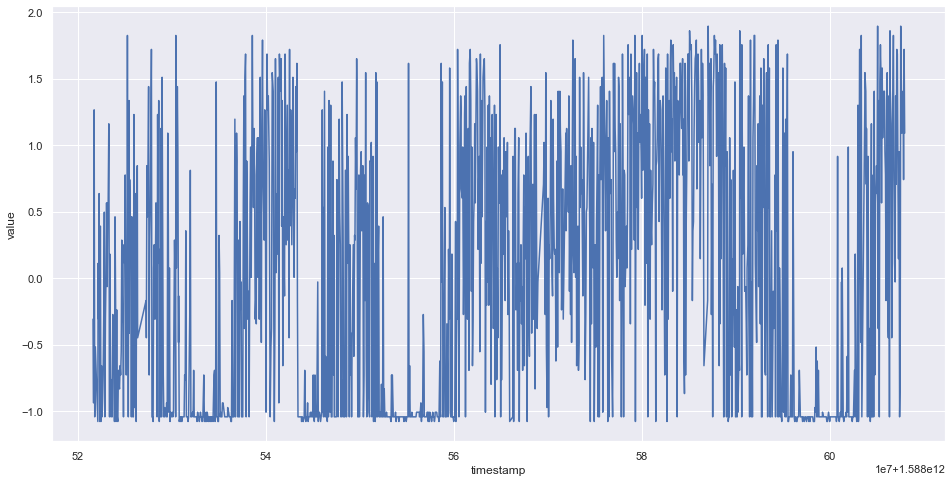

In [27]:
df_train = dfs['dcos_docker'][dfs['dcos_docker'].cmdb_id == 'docker_003'][dfs['dcos_docker'].name=='container_cpu_used']
df_train = df_train.set_index('timestamp')[['value']]

In [31]:
TIME_STEPS = 288

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_train.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (1092, 288, 1)


In [32]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 144, 32)           256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 144, 32)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 72, 16)            3600      
_________________________________________________________________
conv1d_transpose_9 (Conv1DTr (None, 144, 16)           1808      
_________________________________________________________________
dropout_7 (Dropout)          (None, 144, 16)           0         
_________________________________________________________________
conv1d_transpose_10 (Conv1DT (None, 288, 32)           3616      
_________________________________________________________________
conv1d_transpose_11 (Conv1DT (None, 288, 1)           

In [33]:
history = model.fit(
    x_train,
    x_train,
    epochs=60,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/60
8/8 [==============================] - 0s 37ms/step - loss: 0.9683 - val_loss: 0.9978
Epoch 2/60
8/8 [==============================] - 0s 22ms/step - loss: 0.8132 - val_loss: 0.7126
Epoch 3/60
8/8 [==============================] - 0s 22ms/step - loss: 0.6333 - val_loss: 0.6088
Epoch 4/60
8/8 [==============================] - 0s 21ms/step - loss: 0.5634 - val_loss: 0.5795
Epoch 5/60
8/8 [==============================] - 0s 21ms/step - loss: 0.5272 - val_loss: 0.5583
Epoch 6/60
8/8 [==============================] - 0s 21ms/step - loss: 0.4989 - val_loss: 0.4987
Epoch 7/60
8/8 [==============================] - 0s 22ms/step - loss: 0.4495 - val_loss: 0.4165
Epoch 8/60
8/8 [==============================] - 0s 22ms/step - loss: 0.3769 - val_loss: 0.3063
Epoch 9/60
8/8 [==============================] - 0s 21ms/step - loss: 0.3103 - val_loss: 0.2253
Epoch 10/60
8/8 [==============================] - 0s 25ms/step - loss: 0.2589 - val_loss: 0.1740
Epoch 11/60
8/8 [============

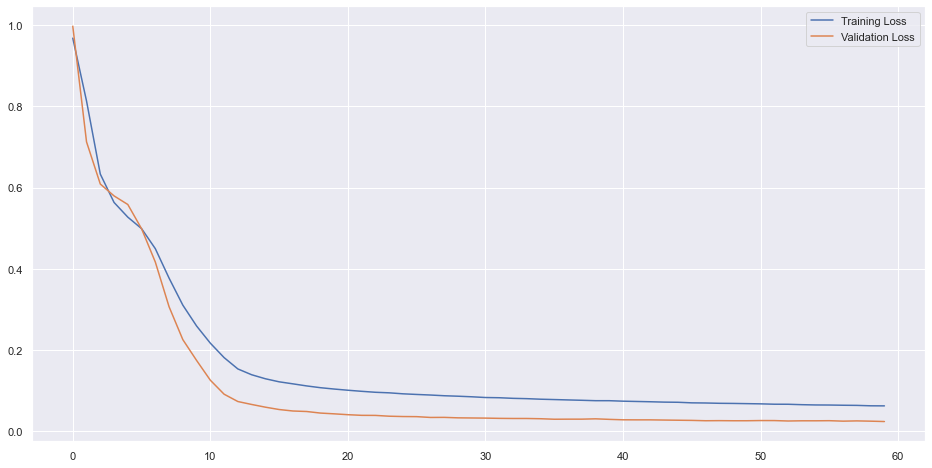

In [34]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

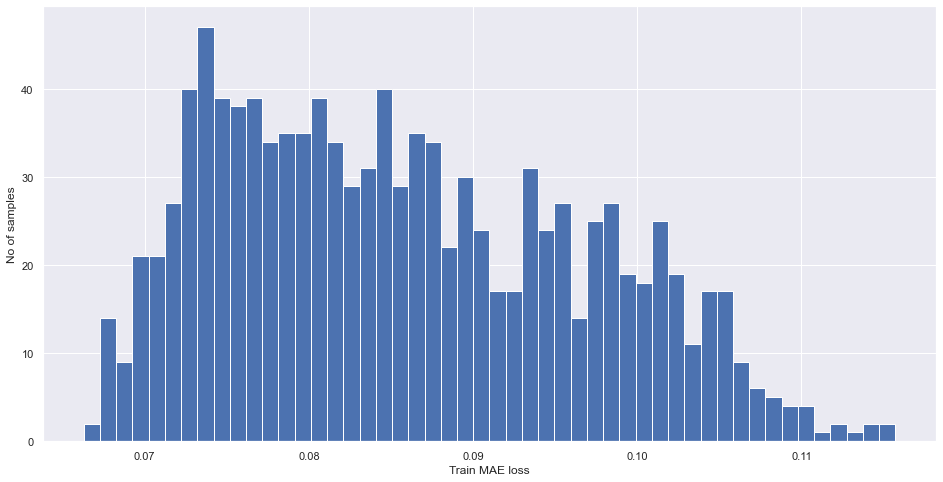

Reconstruction error threshold:  0.11572311706632694


In [35]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

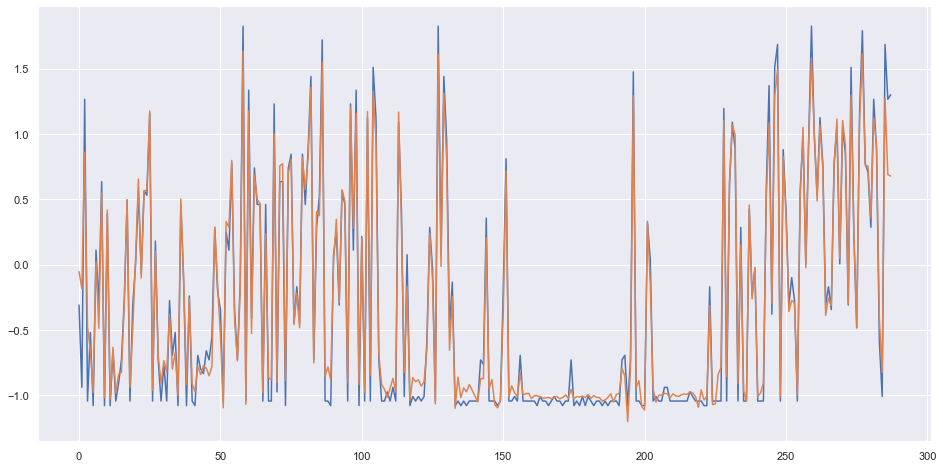

In [36]:
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

In [37]:
data_path = '../../../data/test_data/host'
dfs_test = {}
for file in os.listdir(data_path):
    print('Reading ' + file)
    dfs_test[file[:-4]] = pd.read_csv(data_path+'/'+file) 

Reading os.csv
Reading db.csv
Reading redis.csv
Reading container.csv
Reading docker.csv


<ipython-input-38-0291cb22a892>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test = dfs_test['docker'][dfs_test['docker'].cmdb_id == 'docker_003'][dfs_test['docker'].name=='container_cpu_used']


<AxesSubplot:xlabel='timestamp', ylabel='value'>

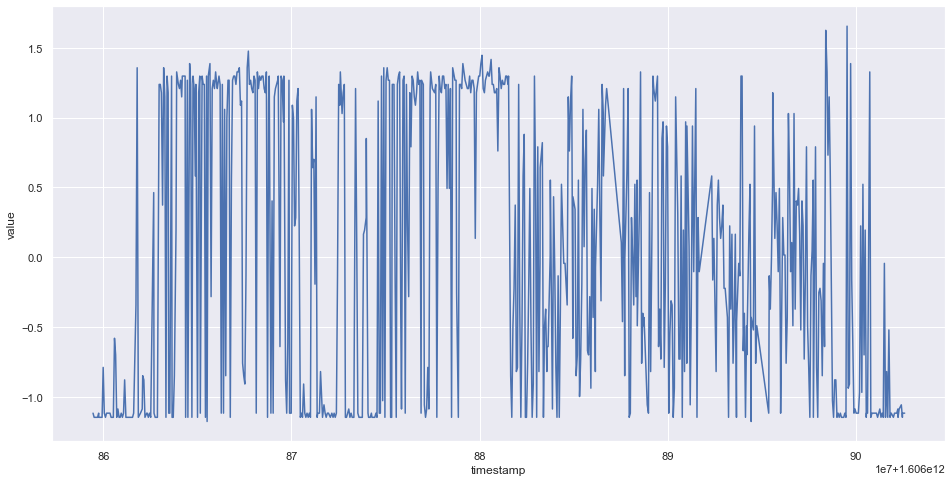

In [38]:
df_test = dfs_test['docker'][dfs_test['docker'].cmdb_id == 'docker_003'][dfs_test['docker'].name=='container_cpu_used']
df_test = df_test.set_index('timestamp')[['value']]
training_mean = df_test['value'].mean()
training_std = df_test['value'].std()
df_test['value'] = (df_test['value'] - training_mean) / training_std

sns.lineplot(x='timestamp', y='value', data=df_test)


In [41]:
TIME_STEPS = 288

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_test = create_sequences(df_test.values)
print("Training input shape: ", x_test.shape)

Training input shape:  (393, 288, 1)


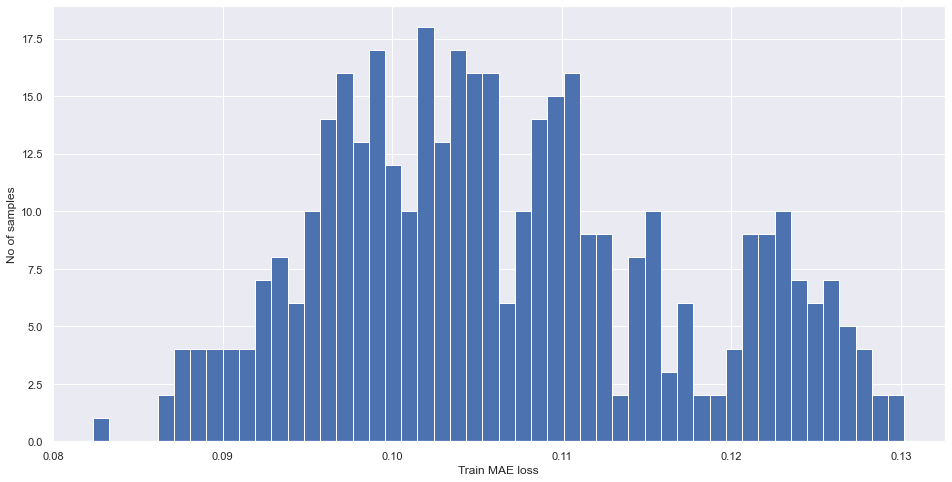

Reconstruction error threshold:  0.1302063296106185


In [42]:
# Get train MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

plt.hist(test_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(test_mae_loss)
print("Reconstruction error threshold: ", threshold)

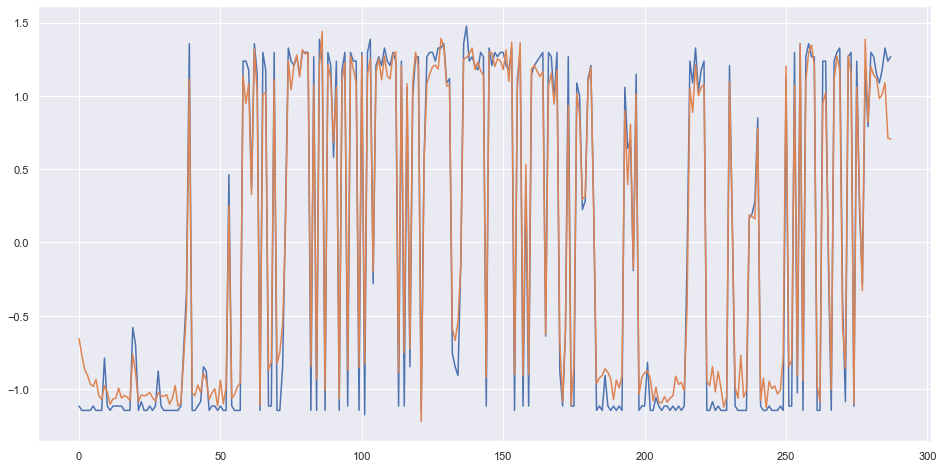

In [43]:
plt.plot(x_test[0])
plt.plot(x_test_pred[0])
plt.show()

1360